The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[WARN] Failed to load descriptor from ./mapping_schemes/mapping_scheme_400_adi.py: No module named 'adi._adi_cffi'
[WARN] Failed to load descriptor from ./mapping_schemes/mapping_scheme_378.py: No module named 'adi._adi_cffi'
[INFO] Loaded 32 descriptor(s) from ./mapping_schemes
Selected mapping: acq_mapping_001
Score: 3


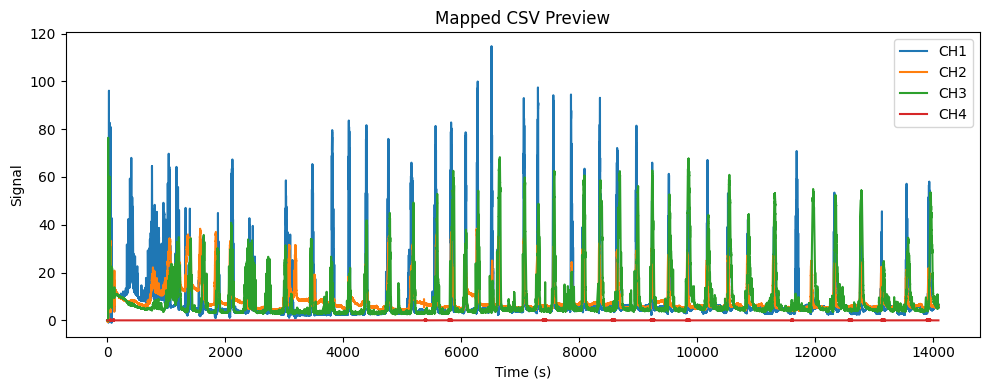

✅ Saved standardized data to: output/20_1021.acq


In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 3

import matplotlib.pyplot as plt
from pathlib import Path
from sparcfuse.utils import match_best_mapping, load_all_descriptors, save_standardized_output

# Load all descriptor files from folder
descriptors = load_all_descriptors()

# File to convert
filepath = "../output/20_1021.acq"
filename = Path(filepath).name

# Optional: specify SPARC ID for faster mapping
result = match_best_mapping(descriptors, filepath, sparc_id=224)

# Check if mapping was successful
if result["descriptor"] is None:
    raise RuntimeError("No suitable mapping descriptor found.")

# Show mapping result
print("Selected mapping:", result['descriptor']['id'])
print("Score:", result['score'])

# Preview signal
time = result['result']['time']
signals = result['result']['signals']

plt.figure(figsize=(10, 4))
for i, ch in enumerate(signals):
    plt.plot(time, ch, label=f"CH{i+1}")
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Mapped CSV Preview")
plt.legend()
plt.tight_layout()
plt.show()

# Save to standardized .npz format in ./output
output_dir = Path("../output")
output_dir.mkdir(parents=True, exist_ok=True)

output_path = output_dir / filename.replace(".csv", ".npz")

save_standardized_output(
    output_path=output_path,
    result_dict=result["result"],
    descriptor=result["descriptor"],
    original_filename=filename,
    annotations=result["result"].get("annotations", []),
    metadata_overrides=None,
    file_format="npz"
)

print(f"✅ Saved standardized data to: {output_path}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load the .npz file
npz_path = Path("../output/20 1023.npz")
data = np.load(npz_path, allow_pickle=True)

# Extract arrays
time = data["time"]
signals = data["signals"]
metadata = data["metadata"].item()  # metadata is saved as a Python dict
channel_names = metadata.get("channel_names", [f"CH{i+1}" for i in range(len(signals))])

# Plot
plt.figure(figsize=(10, 4))
for i, ch in enumerate(signals):
    plt.plot(time, ch, label=channel_names[i])
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Sanity Check: Reloaded from NPZ")
plt.legend()
plt.tight_layout()
plt.show()

print(data['metadata'])